Project pt.1 / Samuele / width and lenght distribution

In [91]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
#load data

--2025-01-24 14:11:01--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘magic04.data.5’

magic04.data.5          [          <=>       ]   1.41M   735KB/s    in 2.0s    

2025-01-24 14:11:04 (735 KB/s) - ‘magic04.data.5’ saved [1477391]



In [92]:
!cat /home/samu/LaboratoryOfComputationalPhysics_Y7/Project/magic04.data  ## show data

cat: /home/samu/LaboratoryOfComputationalPhysics_Y7/Project/magic04.data: No such file or directory


In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.random as rnd


In [187]:
#file_name="/home/samu/LaboratoryOfComputationalPhysics_Y7/Project/magic04.data"
file_name="magic04.data"
data = pd.DataFrame(pd.read_csv(file_name))
data.columns=['fLength','fWidth','fSize',
        'fConc','fConc1','fAsym',
        'fM3Long','fM3Trans','fAlpha','fDist','category']
data   
#### save data in a DataFrame


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,category
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


# punto 1 (Luca)
Study the features of the datasets and compare them for signal and background events

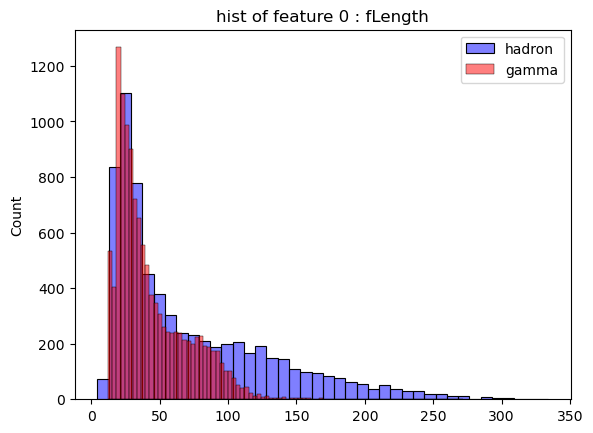

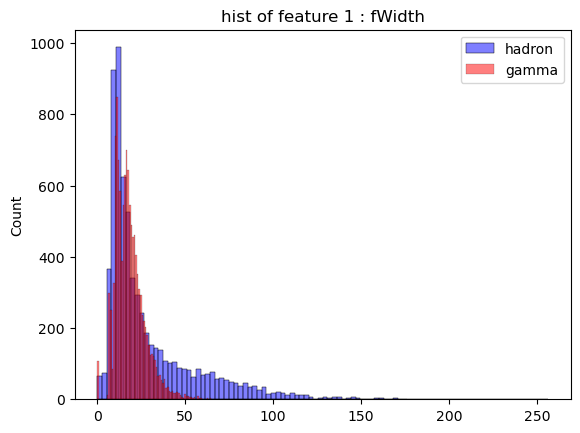

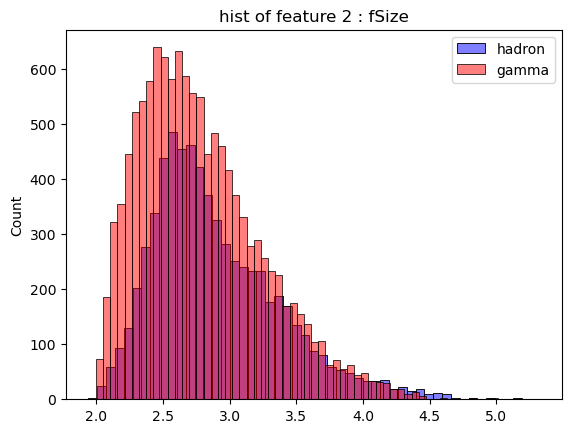

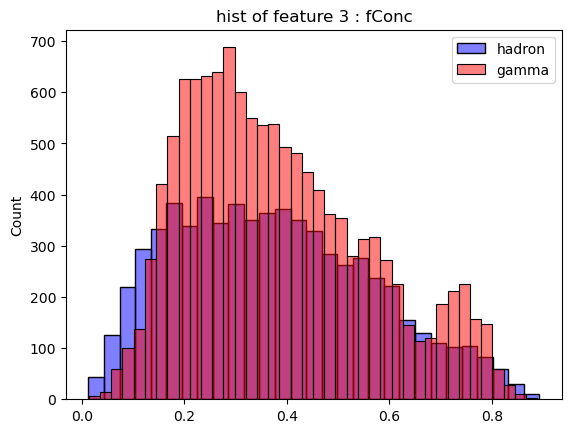

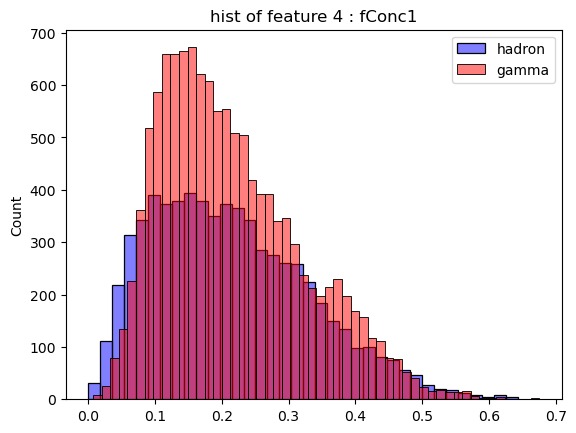

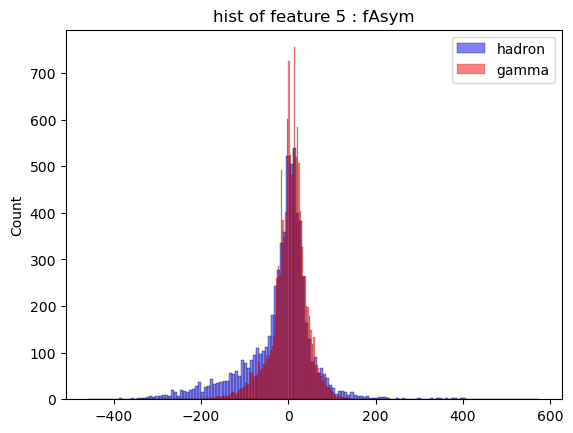

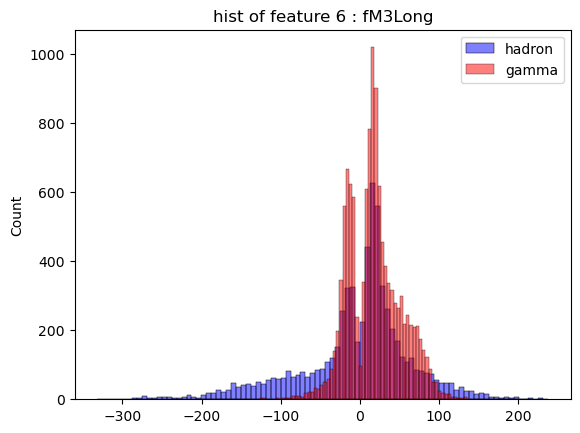

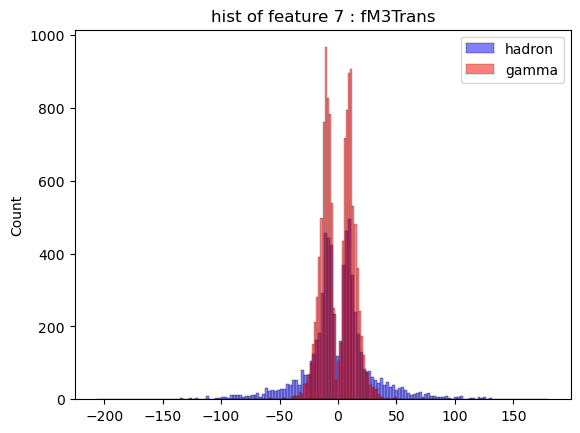

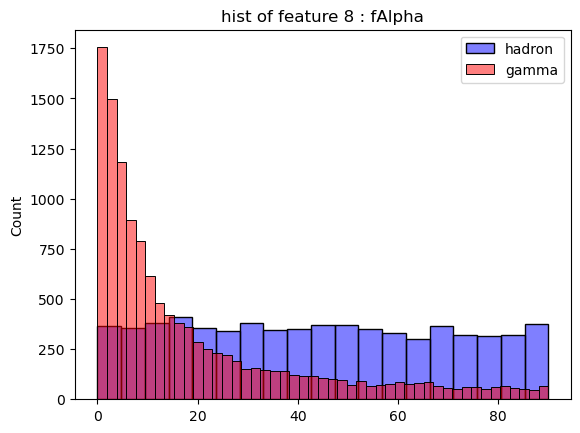

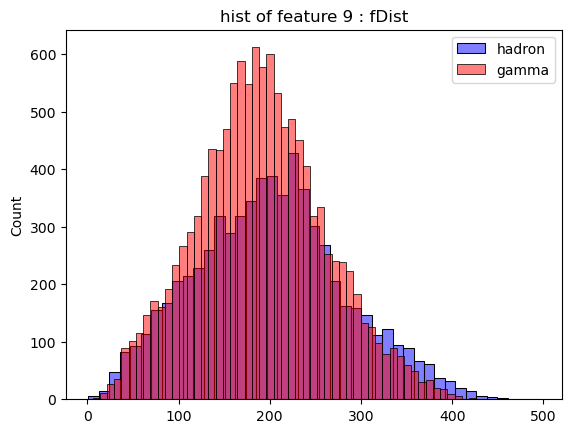

In [95]:
# making director for saving plots
import os

dir_name = 'punto_1_plots'

if not os.path.exists(dir_name):
    os.makedirs(dir_name)


# X contains features, Y contains categories
X = data.loc[:,'fLength':'fDist']
Y = data.loc[:,'category']

for i in range(X.shape[1]):
    x_g = []
    x_h = []
    X_temp = X[str(X.columns[i])]
    for j in range(X.shape[0]):
        if (Y[j] == 'g'):
            x_g.append(X_temp[j])
        if (Y[j] == 'h'):
            x_h.append(X_temp[j])
    
    titolo = 'hist of feature ' + str(i) + ' : ' + X.columns[i]
    img_name = 'hist_'+str(i)+'_'+X.columns[i]+'.png'
    sns.histplot(x_h,label='hadron',alpha=0.5,color='blue')
    sns.histplot(x_g,label='gamma',alpha=0.5,color='red')
    plt.title(titolo)
    plt.legend()
    plt.savefig(os.path.join(dir_name, img_name))
    plt.show()
    
# plot are saved in a folder named 'punto_1_plots'

# punto 2 (Luca)
Study the correlations among the features of the datasets for signal and background events

Rescaling features to average = 0 and std = 1

In [96]:
X_rescaled = X
for i in range(X.shape[1]):
    h = X[str(X.columns[i])]
    avg = np.average(h)
    std = np.std(h)
    h = h - avg
    h = h / std
    X_rescaled[str(X_rescaled.columns[i])] = h
    


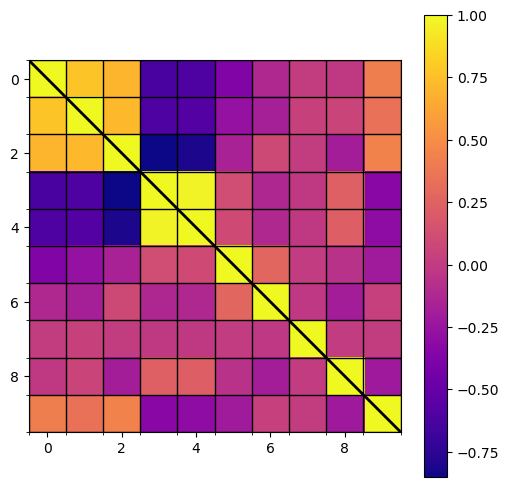

In [97]:
# too much memory is needed to compute np.cov(X,X)
# we're going to do this label by label

cov = np.zeros((X_rescaled.shape[1],X_rescaled.shape[1]))
for i in range(X_rescaled.shape[1]):
    h = X_rescaled[str(X_rescaled.columns[i])]
    for j in range(X_rescaled.shape[1]):
        v = X_rescaled[str(X_rescaled.columns[j])]
        cov[i,j] = (np.cov(h,v)[0,1])


            
ticks = np.arange(0,10,1)
fig, ax = plt.subplots(figsize=(6, 6))
cax = ax.imshow(cov, cmap='plasma', interpolation='nearest')
fig.colorbar(cax)
ax.set_xticks(np.arange(-0.5, cov.shape[1], 1), minor=True)
ax.set_yticks(np.arange(-0.5, cov.shape[0], 1), minor=True)
ax.grid(which='minor', color='black', linewidth=1)
ax.plot([-0.5, cov.shape[1]-0.5], [-0.5, cov.shape[0]-0.5], color='black', linewidth=2, linestyle='-')

#for i in range(cov.shape[0]):
#    for j in range(cov.shape[1]):
#        plt.text(j, i, f'{cov[i, j]:.2f}', ha='center', va='center', color='white', fontsize=8)
plt.show()

In [98]:
print('correlation of f0 and f1:',cov[0,1])
print('correlation of f0 and f2:',cov[0,2])
print('correlation of f3 and f4:',cov[3,4])
print('correlation of f2 and f3:',cov[2,3])
print('correlation of f2 and f4:',cov[2,4])

correlation of f0 and f1: 0.7705513795510602
correlation of f0 and f2: 0.7024879620910527
correlation of f3 and f4: 0.9764643541477542
correlation of f2 and f3: -0.8508966163126169
correlation of f2 and f4: -0.8088840867977037


Looks like we have good correlation between
- features 0-1
- features 0-2
- features 3-4

And good anti-correlation between
- features 2-3
- features 2-4

Porco dio Johnny la prossima volta che mi fai un audio ammazzo un pesce 🐟 

In [99]:
Xg_rescaled = X_rescaled[Y == 'g']
Xh_rescaled = X_rescaled[Y == 'h']

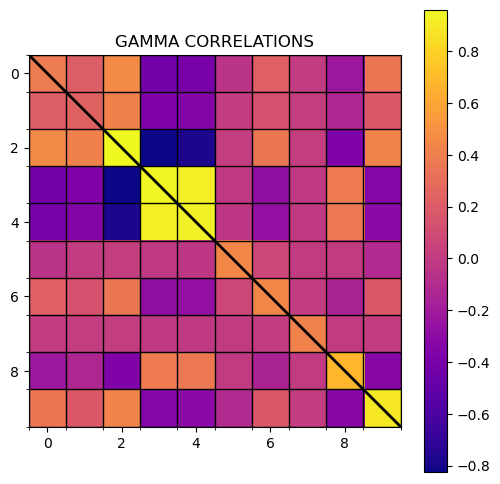

In [100]:
# too much memory is needed to compute np.cov(X,X)
# we're going to do this label by label

cov = np.zeros((Xg_rescaled.shape[1],Xg_rescaled.shape[1]))
for i in range(Xg_rescaled.shape[1]):
    h = Xg_rescaled[str(Xg_rescaled.columns[i])]
    for j in range(Xg_rescaled.shape[1]):
        v = Xg_rescaled[str(Xg_rescaled.columns[j])]
        cov[i,j] = (np.cov(h,v)[0,1])
        
ticks = np.arange(0,10,1)
fig, ax = plt.subplots(figsize=(6, 6))
cax = ax.imshow(cov, cmap='plasma', interpolation='nearest')
fig.colorbar(cax)
ax.set_xticks(np.arange(-0.5, cov.shape[1], 1), minor=True)
ax.set_yticks(np.arange(-0.5, cov.shape[0], 1), minor=True)
ax.grid(which='minor', color='black', linewidth=1)
ax.plot([-0.5, cov.shape[1]-0.5], [-0.5, cov.shape[0]-0.5], color='black', linewidth=2, linestyle='-')
plt.title('GAMMA CORRELATIONS')
#for i in range(cov.shape[0]):
#    for j in range(cov.shape[1]):
#        plt.text(j, i, f'{cov[i, j]:.2f}', ha='center', va='center', color='white', fontsize=8)
plt.show()

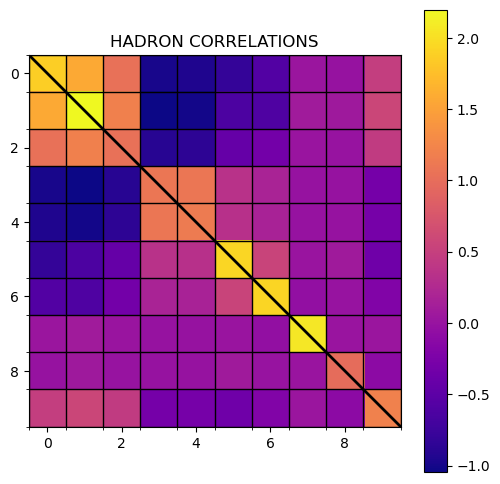

In [101]:
# too much memory is needed to compute np.cov(X,X)
# we're going to do this label by label

cov = np.zeros((Xh_rescaled.shape[1],Xh_rescaled.shape[1]))
for i in range(Xh_rescaled.shape[1]):
    h = Xh_rescaled[str(Xh_rescaled.columns[i])]
    for j in range(Xh_rescaled.shape[1]):
        v = Xh_rescaled[str(Xh_rescaled.columns[j])]
        cov[i,j] = (np.cov(h,v)[0,1])
        
ticks = np.arange(0,10,1)
fig, ax = plt.subplots(figsize=(6, 6))
cax = ax.imshow(cov, cmap='plasma', interpolation='nearest')
fig.colorbar(cax)
ax.set_xticks(np.arange(-0.5, cov.shape[1], 1), minor=True)
ax.set_yticks(np.arange(-0.5, cov.shape[0], 1), minor=True)
ax.grid(which='minor', color='black', linewidth=1)
ax.plot([-0.5, cov.shape[1]-0.5], [-0.5, cov.shape[0]-0.5], color='black', linewidth=2, linestyle='-')
plt.title('HADRON CORRELATIONS')
#for i in range(cov.shape[0]):
#    for j in range(cov.shape[1]):
#        plt.text(j, i, f'{cov[i, j]:.2f}', ha='center', va='center', color='white', fontsize=8)
plt.show()

# punto 3 (Samu)

Compute the "mean-scaled-width" and the "mean-scale-length", i.e. rescale by means of their mean and standard deviation the "Width" and "Length" distributions. Compare them for signal and background events in the cases of little or a lot of light ("fSize")

In [120]:
## save the two columns I care about
## I may not need this if I use only dataframe and pandas
#length = np.array(data.fLength)
#print('lenght=', length)
#width = np.array(data.fWidth)
#print('width=',width)

## find mean and std
##print(data.describe()) ##useful as a comparison, gives you general values of the dataset, also mean and std
mu_l=data['fLength'].mean()
std_l=data['fLength'].std()
mu_w=data['fWidth'].mean()
std_w=data['fWidth'].std()
print('Length attribute:   mean = ', mu_l, '    std = ', std_l)
print('Width attribute:    mean = ', mu_w, '   std = ', std_w)


Length attribute:   mean =  53.25143966559756     std =  42.3655976356796
Width attribute:    mean =  22.181291098375308    std =  18.34648391015197


    scaled_fLength  scaled_fWidth   fLength    fWidth
0        -0.510977      -0.570016   31.6036   11.7235
1         2.568135       6.205533  162.0520  136.0310
2        -0.694767      -0.687243   23.8172    9.5728
3         0.516569       0.476342   75.1362   30.9205
4        -0.038414      -0.056201   51.6240   21.1502
5        -0.118130      -0.262982   48.2468   17.3565
6        -0.624604      -0.459041   26.7897   13.7595
7         1.014532       1.326424   96.2327   46.5165
8        -0.153179      -0.380563   46.7619   15.1993
9         0.224832       0.421286   62.7766   29.9104
10       -0.811867      -0.311847   18.8562   16.4600
11       -0.179847       0.028818   45.6321   22.7100
12       -0.473725      -0.529572   33.1818   12.4655
13        0.170104       0.595472   60.4580   33.1061
14       -0.561242       0.015088   29.4741   22.4581
15       -0.403095      -0.244995   36.1741   17.6865
16       -0.164283      -0.335132   46.2915   16.0328
17       -0.169775      -0.1

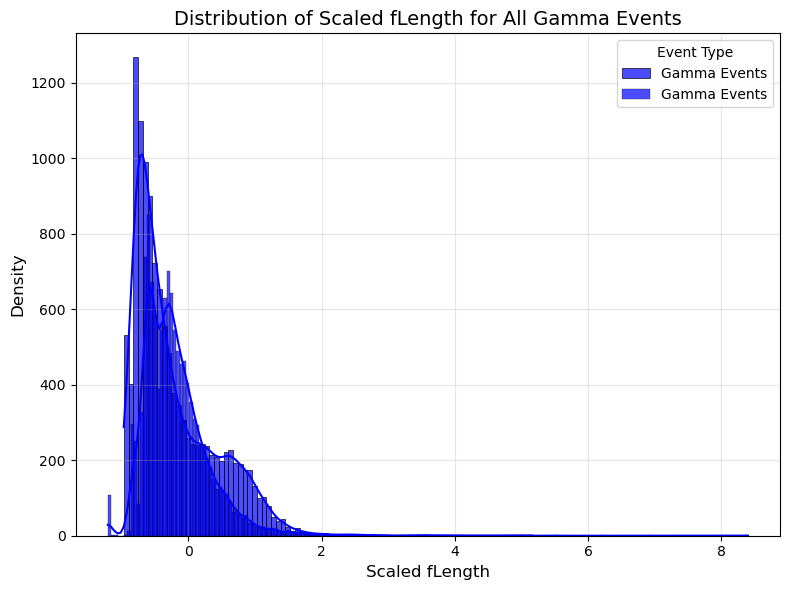

In [121]:
#### ATTENZIONE RUNNARE TUTTO ASSICURARSI CHE SIA FATTO BENE IL DATAFRAME E MU E STD CHE SE NO SI SFANCULA TUTTO

#print(data['fLength'].head(30))
data['scaled_fLength']= (data['fLength']-mu_l)/std_l   ##add a scaled comlumn to the DataFrame
data['scaled_fWidth']= (data['fWidth']-mu_w)/std_w  
print(data[['scaled_fLength','scaled_fWidth','fLength','fWidth']].head(30))
#print(data['scaled_fLength'].mean())
#print(data['scaled_fLength'].std())


## Plot the distribution for scaled fLength (all gamma events)
plt.figure(figsize=(8, 6))
sns.histplot(data[data['category'] == 'g']['scaled_fLength'], kde=True, color='blue', label='Gamma Events', alpha=0.7)
sns.histplot(data[data['category'] == 'g']['scaled_fWidth'], kde=True, color='blue', label='Gamma Events', alpha=0.7)


## Add titles and labels
plt.title("Distribution of Scaled fLength for All Gamma Events", fontsize=14)
plt.xlabel("Scaled fLength", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="Event Type", fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Show the plot
plt.show()



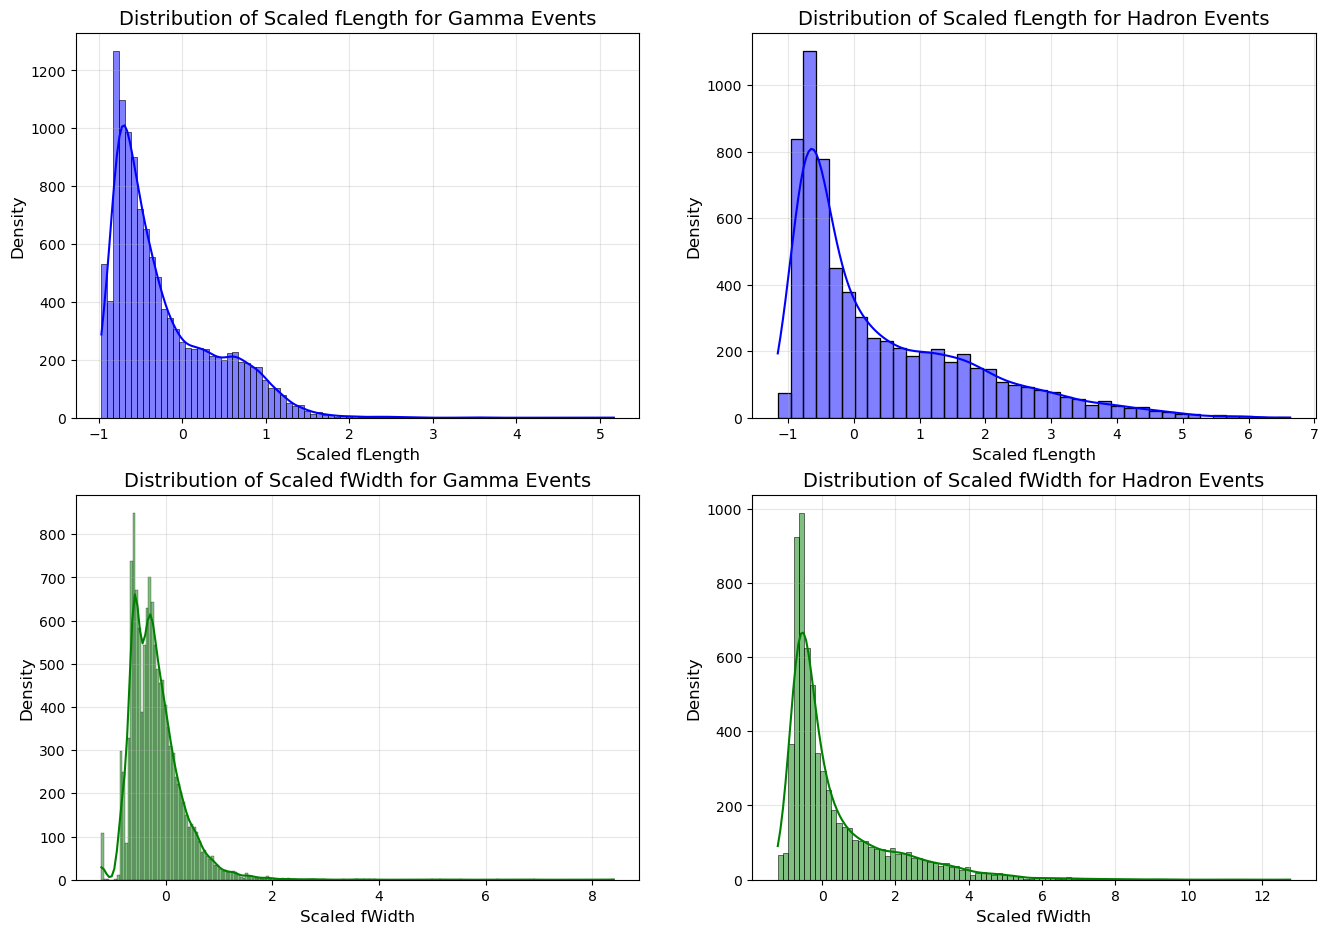

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(16, 11))

# Plot for scaled fLength, cat=g
sns.histplot(data[data['category'] == 'g']['scaled_fLength'], kde=True, color='blue', ax=axes[0][0])
axes[0][0].set_title("Distribution of Scaled fLength for Gamma Events", fontsize=14)
axes[0][0].set_xlabel("Scaled fLength", fontsize=12)
axes[0][0].set_ylabel("Density", fontsize=12)
axes[0][0].grid(True, alpha=0.3)

# Plot for scaled fWidth, cat=g
sns.histplot(data[data['category'] == 'g']['scaled_fWidth'], kde=True, color='green', ax=axes[1][0])
axes[1][0].set_title("Distribution of Scaled fWidth for Gamma Events", fontsize=14)
axes[1][0].set_xlabel("Scaled fWidth", fontsize=12)
axes[1][0].set_ylabel("Density", fontsize=12)
axes[1][0].grid(True, alpha=0.3)

# Plot for scaled fLength, cat=h
sns.histplot(data[data['category'] == 'h']['scaled_fLength'], kde=True, color='blue', ax=axes[0][1])
axes[0][1].set_title("Distribution of Scaled fLength for Hadron Events", fontsize=14)
axes[0][1].set_xlabel("Scaled fLength", fontsize=12)
axes[0][1].set_ylabel("Density", fontsize=12)
axes[0][1].grid(True, alpha=0.3)

# Plot for scaled fWidth, cat=h
sns.histplot(data[data['category'] == 'h']['scaled_fWidth'], kde=True, color='green', ax=axes[1][1])
axes[1][1].set_title("Distribution of Scaled fWidth for Hadron Events", fontsize=14)
axes[1][1].set_xlabel("Scaled fWidth", fontsize=12)
axes[1][1].set_ylabel("Density", fontsize=12)
axes[1][1].grid(True, alpha=0.3)

In [9]:
#fig, axes = plt.subplots(1, 2, figsize=(15, 6))
#sns.histplot(data['fSize'], kde=True, color='blue', label='Low Light', alpha=0.7, ax=axes[0])
#sns.histplot(10**data['fSize'], kde=True, color='blue', label='Low Light', alpha=0.7,ax=axes[1])
#plt.show()

median_fSize = data['fSize'].median()
min_fSize = data['fSize'].min()
max_fSize = data['fSize'].max()
print("data for fSize: median= ",median_fSize, 'min= ', min_fSize, 'max= ', max_fSize)
#### I don't know if I should differentiate between median of h and g I don't think so because the light quantity 
#### should be independent from the nature of the phenomenon
##as a threshold I don't know if need to use a median or maybe just the half


data for fSize: median=  2.7396 min=  1.9413 max=  5.3233


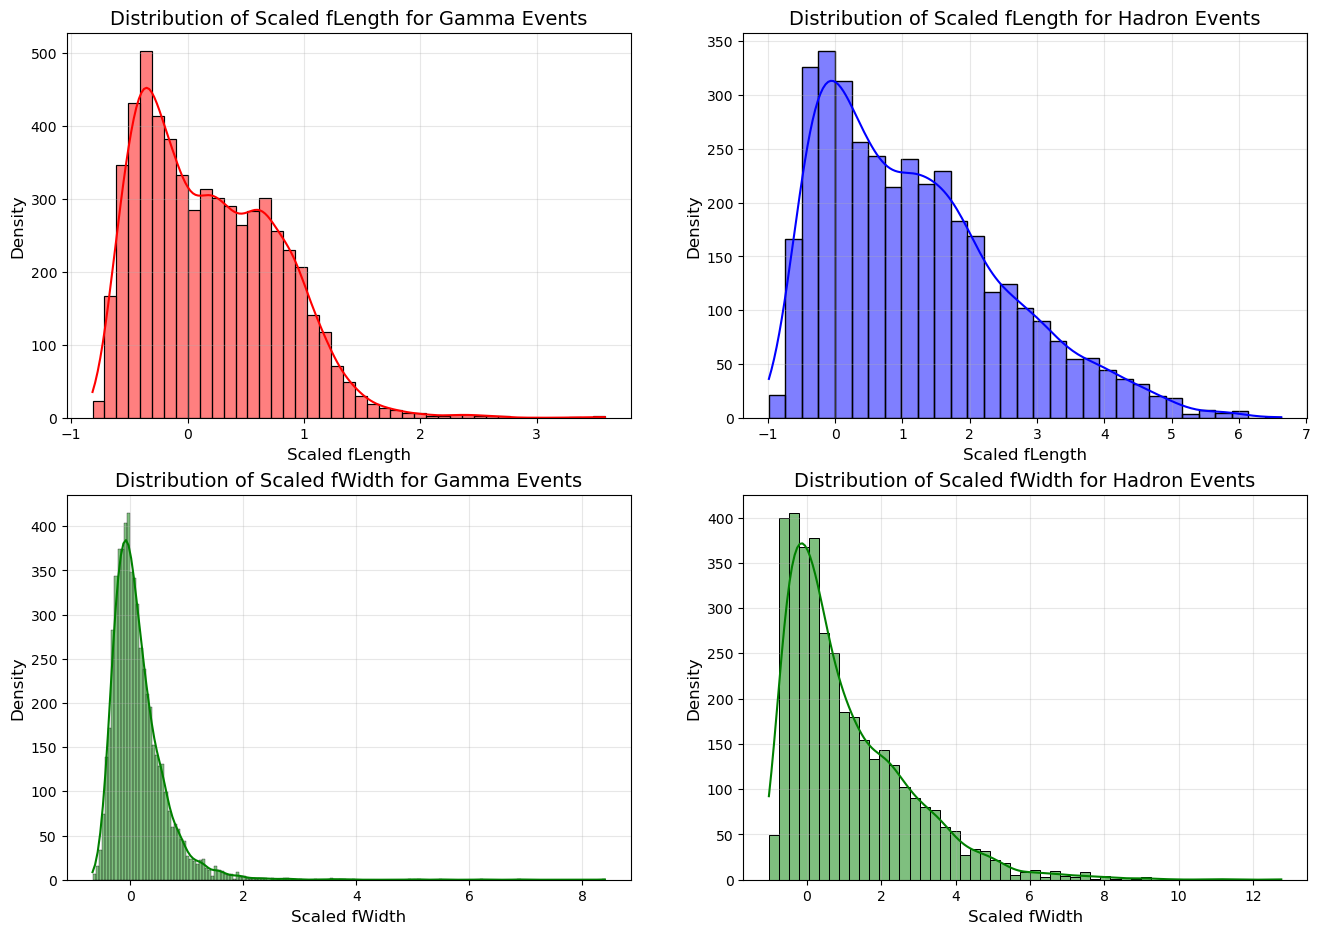

In [10]:
## suppose I use the median

#high_light=data[data['fSize']>median_fSize]
#print(high_light[])

### HIGH LIGHT  ############

fig, axes = plt.subplots(2, 2, figsize=(16, 11))

# Plot for scaled fLength, cat=g
sns.histplot(data[data['category'] == 'g']['scaled_fLength'][data['fSize'] >= median_fSize], kde=True, color='red', ax=axes[0][0])
axes[0][0].set_title("Distribution of Scaled fLength for Gamma Events", fontsize=14)
axes[0][0].set_xlabel("Scaled fLength", fontsize=12)
axes[0][0].set_ylabel("Density", fontsize=12)
axes[0][0].grid(True, alpha=0.3)

# Plot for scaled fWidth, cat=g
sns.histplot(data[data['category'] == 'g']['scaled_fWidth'][data['fSize'] >= median_fSize], kde=True, color='green', ax=axes[1][0])
axes[1][0].set_title("Distribution of Scaled fWidth for Gamma Events", fontsize=14)
axes[1][0].set_xlabel("Scaled fWidth", fontsize=12)
axes[1][0].set_ylabel("Density", fontsize=12)
axes[1][0].grid(True, alpha=0.3)

# Plot for scaled fLength, cat=h
sns.histplot(data[data['category'] == 'h']['scaled_fLength'][data['fSize'] >= median_fSize], kde=True, color='blue', ax=axes[0][1])
axes[0][1].set_title("Distribution of Scaled fLength for Hadron Events", fontsize=14)
axes[0][1].set_xlabel("Scaled fLength", fontsize=12)
axes[0][1].set_ylabel("Density", fontsize=12)
axes[0][1].grid(True, alpha=0.3)

# Plot for scaled fWidth, cat=h
sns.histplot(data[data['category'] == 'h']['scaled_fWidth'][data['fSize'] >= median_fSize], kde=True, color='green', ax=axes[1][1])
axes[1][1].set_title("Distribution of Scaled fWidth for Hadron Events", fontsize=14)
axes[1][1].set_xlabel("Scaled fWidth", fontsize=12)
axes[1][1].set_ylabel("Density", fontsize=12)
axes[1][1].grid(True, alpha=0.3)

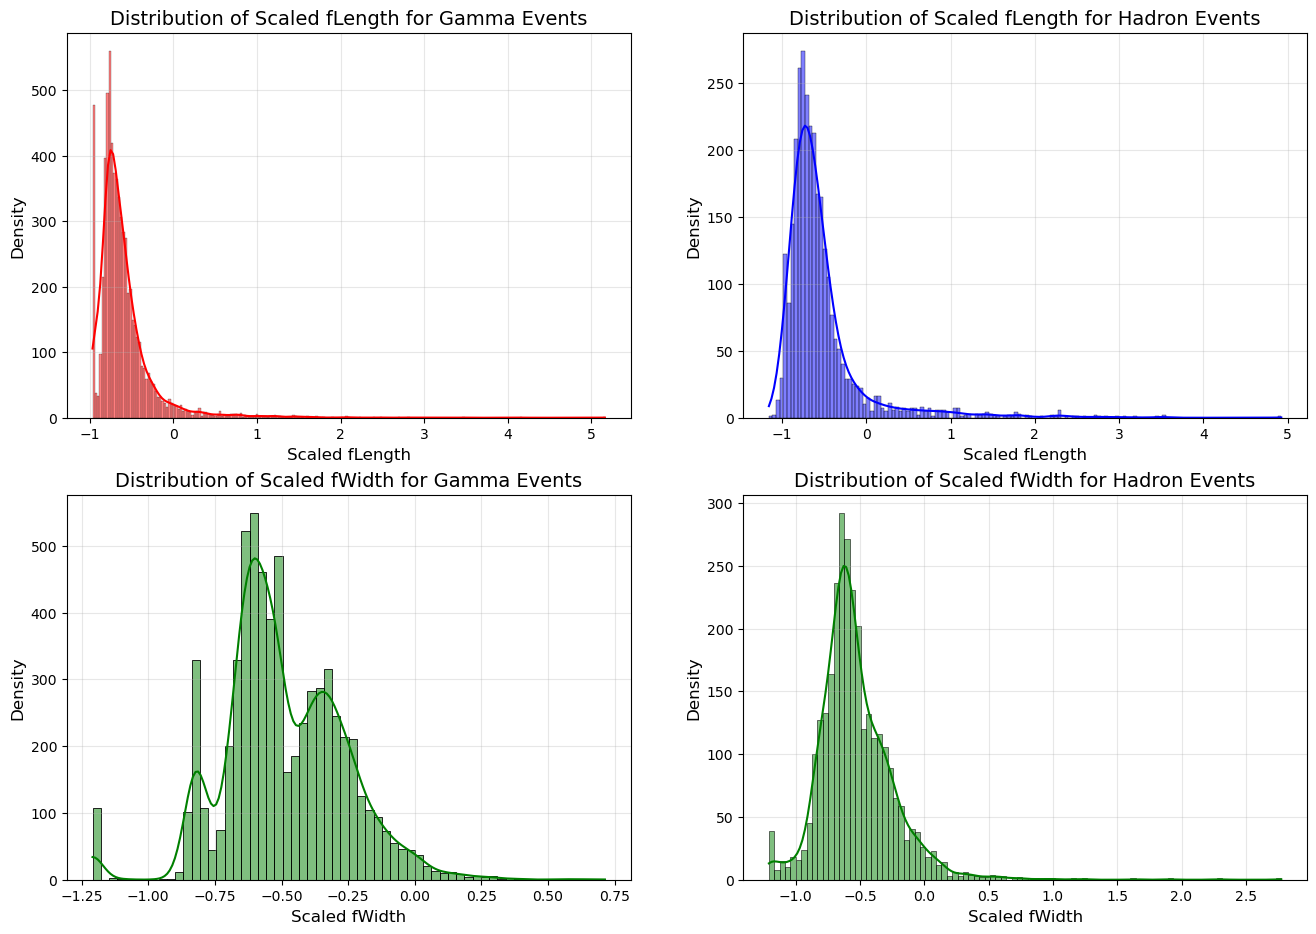

In [11]:
### LOW LIGHT  ############

fig, axes = plt.subplots(2, 2, figsize=(16, 11))

# Plot for scaled fLength, cat=g
sns.histplot(data[data['category'] == 'g']['scaled_fLength'][data['fSize'] <= median_fSize], kde=True, color='red', ax=axes[0][0])
axes[0][0].set_title("Distribution of Scaled fLength for Gamma Events", fontsize=14)
axes[0][0].set_xlabel("Scaled fLength", fontsize=12)
axes[0][0].set_ylabel("Density", fontsize=12)
axes[0][0].grid(True, alpha=0.3)

# Plot for scaled fWidth, cat=g
sns.histplot(data[data['category'] == 'g']['scaled_fWidth'][data['fSize'] <= median_fSize], kde=True, color='green', ax=axes[1][0])
axes[1][0].set_title("Distribution of Scaled fWidth for Gamma Events", fontsize=14)
axes[1][0].set_xlabel("Scaled fWidth", fontsize=12)
axes[1][0].set_ylabel("Density", fontsize=12)
axes[1][0].grid(True, alpha=0.3)

# Plot for scaled fLength, cat=h
sns.histplot(data[data['category'] == 'h']['scaled_fLength'][data['fSize'] <= median_fSize], kde=True, color='blue', ax=axes[0][1])
axes[0][1].set_title("Distribution of Scaled fLength for Hadron Events", fontsize=14)
axes[0][1].set_xlabel("Scaled fLength", fontsize=12)
axes[0][1].set_ylabel("Density", fontsize=12)
axes[0][1].grid(True, alpha=0.3)

# Plot for scaled fWidth, cat=h
sns.histplot(data[data['category'] == 'h']['scaled_fWidth'][data['fSize'] <= median_fSize], kde=True, color='green', ax=axes[1][1])
axes[1][1].set_title("Distribution of Scaled fWidth for Hadron Events", fontsize=14)
axes[1][1].set_xlabel("Scaled fWidth", fontsize=12)
axes[1][1].set_ylabel("Density", fontsize=12)
axes[1][1].grid(True, alpha=0.3)

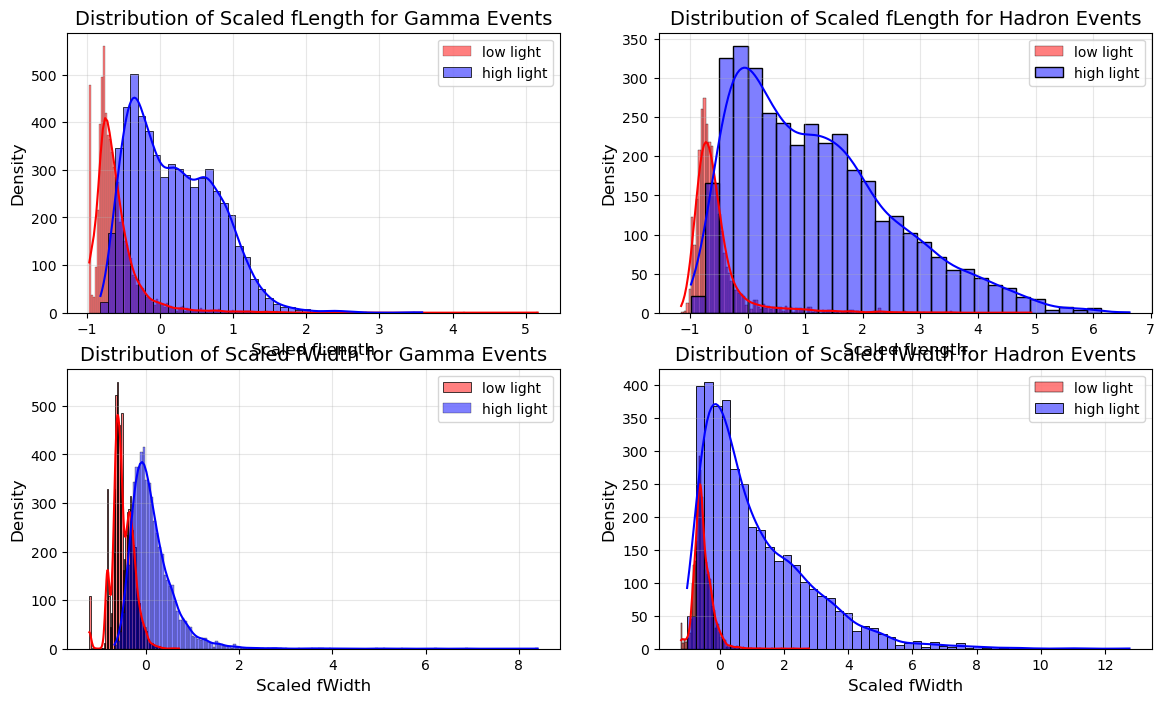

In [12]:
### LOW LIGHT  ############

fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# Plot for scaled fLength, cat=g
sns.histplot(data[data['category'] == 'g']['scaled_fLength'][data['fSize'] <= median_fSize], kde=True, color='red', ax=axes[0][0], label='low light')

# Plot for scaled fWidth, cat=g
sns.histplot(data[data['category'] == 'g']['scaled_fWidth'][data['fSize'] <= median_fSize], kde=True, color='red', ax=axes[1][0],label='low light')

# Plot for scaled fLength, cat=h
sns.histplot(data[data['category'] == 'h']['scaled_fLength'][data['fSize'] <= median_fSize], kde=True, color='red', ax=axes[0][1],label='low light')

# Plot for scaled fWidth, cat=h
sns.histplot(data[data['category'] == 'h']['scaled_fWidth'][data['fSize'] <= median_fSize], kde=True, color='red', ax=axes[1][1],label='low light')

### HIGH LIGHT  ############

# Plot for scaled fLength, cat=g
sns.histplot(data[data['category'] == 'g']['scaled_fLength'][data['fSize'] >= median_fSize], kde=True, color='blue', ax=axes[0][0],label='high light')
axes[0][0].set_title("Distribution of Scaled fLength for Gamma Events", fontsize=14)
axes[0][0].set_xlabel("Scaled fLength", fontsize=12)
axes[0][0].set_ylabel("Density", fontsize=12)
axes[0][0].grid(True, alpha=0.3)
axes[0][0].legend()

# Plot for scaled fWidth, cat=g
sns.histplot(data[data['category'] == 'g']['scaled_fWidth'][data['fSize'] >= median_fSize], kde=True, color='blue', ax=axes[1][0],label='high light')
axes[1][0].set_title("Distribution of Scaled fWidth for Gamma Events", fontsize=14)
axes[1][0].set_xlabel("Scaled fWidth", fontsize=12)
axes[1][0].set_ylabel("Density", fontsize=12)
axes[1][0].grid(True, alpha=0.3)
axes[1][0].legend()

# Plot for scaled fLength, cat=h
sns.histplot(data[data['category'] == 'h']['scaled_fLength'][data['fSize'] >= median_fSize], kde=True, color='blue', ax=axes[0][1],label='high light')
axes[0][1].set_title("Distribution of Scaled fLength for Hadron Events", fontsize=14)
axes[0][1].set_xlabel("Scaled fLength", fontsize=12)
axes[0][1].set_ylabel("Density", fontsize=12)
axes[0][1].grid(True, alpha=0.3)
axes[0][1].legend()

# Plot for scaled fWidth, cat=h
sns.histplot(data[data['category'] == 'h']['scaled_fWidth'][data['fSize'] >= median_fSize], kde=True, color='blue', ax=axes[1][1],label='high light')
axes[1][1].set_title("Distribution of Scaled fWidth for Hadron Events", fontsize=14)
axes[1][1].set_xlabel("Scaled fWidth", fontsize=12)
axes[1][1].set_ylabel("Density", fontsize=12)
axes[1][1].grid(True, alpha=0.3)
axes[1][1].legend()

plt.show()

# punto 4 (Johnny)
Perform a Principal Component Analysis on that dataset for the signal and the background events

# punto 5 (LukeBroc)
Perform a multivariate analysis, without using the parameter fAlpha for the classification, with the technique you prefer and evaluate its performance (e.g. in terms of Area Under the (ROC) Curve).

# 5.1 PERCEPTRON

In [188]:
new_Y = []

# gammas are +1    hadrons are -1

for i in range(len(Y)):
    if (Y.iloc[i] == 'g'):
        new_Y.append(1)
    if(Y.iloc[i] == 'h'):
        new_Y.append(-1)
        
Y_df = pd.DataFrame({'category' : new_Y})
data_rescaled_and_indexed = pd.merge(X_rescaled, Y_df,left_index=True, right_index=True)

# data_rescaled_and_indexed contains all features rescaled with avg = 0 and std = 1, and gammas = 1 and hadrons = -1


## Some ML functions

In [189]:
# this function divides the dataset in input in parts_to_be_split parts. One of them is returned as test_set
# the other ones are the training_set. Indexes of the chosen data can be accessed (test_indexes, train_indexes)
# (for example in a K-fold)

def split_train_test_set(data,parts_to_be_split):
    indexes = np.arange(0,data.shape[0],1)
    rnd.shuffle(indexes)
    len_test_set = int(len(indexes) / parts_to_be_split)

    test_indexes = indexes[:len_test_set]
    train_indexes = indexes[len_test_set:]

    train_set = data.iloc[train_indexes]
    test_set = data.iloc[test_indexes]
    
    return train_set, test_set

# this function takes col category and returns as Y (target), the other columns are X (labels)
def split_X_Y(data):
    Y = data['category']
    X = data.drop('category',axis=1)

    return X,Y

Getting the right sets

In [202]:
# divide dataset in 5 parts, taking 1 as test set ( 20 % )
# remove alpha



parts_to_be_split = 5 
train_set, test_set = split_train_test_set( data_rescaled_and_indexed , parts_to_be_split )
train_set = train_set.drop('fAlpha',axis=1)
test_set = test_set.drop('fAlpha',axis=1)
X_train, Y_train = split_X_Y(train_set)
X_test, Y_test = split_X_Y(test_set)

print(np.shape(X_train),np.shape(Y_train))
print(np.shape(X_test),np.shape(Y_test))


(15216, 9) (15216,)
(3803, 9) (3803,)


coding the perceptron

In [203]:
def count_errors(X_train,Y_train,current_w):
    prediction = np.sign(np.dot(current_w,X_train.T))
    indexes = []
    errors = 0
    for i in range(len(prediction)):
        if(prediction[i] != Y_train.iloc[i]):
            indexes.append(i)
            errors += 1
            
    if (errors == 0):
        return 0, -1
    
    return errors, indexes

def random_perceptron_update(X_train,Y_train,current_w):
    
    errors, indexes = count_errors(X_train,Y_train,current_w)
    rnd.shuffle(indexes)
    idx = indexes[0]
    
    if (errors != 0):
        new_w = current_w + Y_train.iloc[idx] * X_train.iloc[idx]
        
    return new_w

def evaluate_misclassification(X_train,Y_train,current_w):
    prediction = np.sign(np.dot(current_w,X_train.T))
    g_miss = 0
    h_miss = 0
    
    for i in range(len(prediction)):
        if(prediction[i] == 1 and Y_train.iloc[i] == -1):
            h_miss += 1
        if(prediction[i] == -1 and Y_train.iloc[i] == 1):
            g_miss += 1
            
    return g_miss,h_miss

def evaluate_test_set(X_test,Y_test,current_w):
    prediction = np.sign(np.dot(current_w,X_test.T))
    g_miss = 0
    h_miss = 0
    
    for i in range(len(prediction)):
        if(prediction[i] == 1 and Y_test.iloc[i] == -1):
            h_miss += 1
        if(prediction[i] == -1 and Y_test.iloc[i] == 1):
            g_miss += 1

    return g_miss,h_miss

def randomized_perceptron(X_train, Y_train, X_test, Y_test, max_iter):
    current_w = np.zeros(len(X_train.columns))
    new_w = current_w.copy()
    best_w = current_w.copy()
    best_errors, _ = count_errors(X_train,Y_train,current_w)
    iteration = 0
    
    g_miss_tot = []
    h_miss_tot = []
    gt_miss_tot = []
    ht_miss_tot = []
    all_w = []
    
    while (best_errors > 0 and iteration < max_iter):
        iteration += 1
        new_w = random_perceptron_update(X_train,Y_train,new_w)
        errors, _ = count_errors(X_train,Y_train,new_w)
        
        if (errors < best_errors):
            best_errors = errors
            best_w = new_w
        
        g_miss, h_miss = evaluate_misclassification(X_train,Y_train,new_w)
        tg_miss, th_miss = evaluate_test_set(X_test,Y_test,new_w)
        g_miss_tot.append(g_miss)
        h_miss_tot.append(h_miss)
        gt_miss_tot.append(tg_miss)
        ht_miss_tot.append(th_miss)
        all_w.append(new_w)
        
    return best_w, all_w, best_errors, g_miss_tot, h_miss_tot, gt_miss_tot, ht_miss_tot

In [206]:
max_iter = 1000

best_w, all_w, best_errors, g_misses, h_misses, test_g_misses, test_h_misses = randomized_perceptron(X_train, Y_train,X_test,Y_test,max_iter)


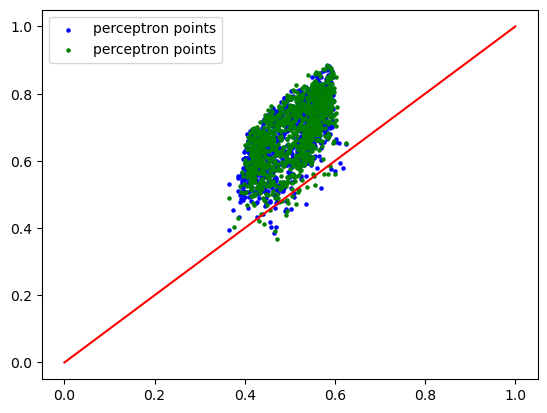

In [207]:
tot_g = len(Y_train[Y_train == 1])
tot_h = len(Y_train[Y_train == -1])
tot_g_test = len(Y_test[Y_test == 1])
tot_h_test = len(Y_test[Y_test == -1])
ROC_X = np.zeros(len(g_misses))
ROC_Y = np.zeros(len(g_misses))
ROC_X_test = np.zeros(len(test_g_misses))
ROC_Y_test = np.zeros(len(test_g_misses))

for i in range(len(g_misses)):
    ROC_Y[i] = ((tot_g - g_misses[i]) / tot_g)
    ROC_X[i] = (h_misses[i] / tot_h)
    ROC_Y_test[i] = ((tot_g_test - test_g_misses[i]) / tot_g_test)
    ROC_X_test[i] = (test_h_misses[i] / tot_h_test)

a = np.linspace(0,1,100)
plt.scatter(ROC_X,ROC_Y,color='blue',label='perceptron points',s=5)
plt.scatter(ROC_X_test,ROC_Y_test,color='green',label='perceptron points',s=5)
plt.plot(a,a,color='red')
plt.legend()
plt.show()

In [208]:
distances = np.zeros(len(ROC_X_test))

for i in range(len(distances)):
    distances[i] = np.sqrt(ROC_X_test[i]**2 + (1-ROC_Y_test[i])**2)

best_index = np.argmin(distances)
best_w = all_w[best_index]

file_name="magic04.data"
data = pd.DataFrame(pd.read_csv(file_name))
data.columns=['fLength','fWidth','fSize',
        'fConc','fConc1','fAsym',
        'fM3Long','fM3Trans','fAlpha','fDist','category']

averages = []
stds = []

for i in range(len(best_w)):
    averages.append(np.average(data[data.columns[i]]))
    stds.append(np.std(data[data.columns[i]]))
    
best_w_rescaled = best_w * stds + averages
print('best W for perceptron and rescaled is:')
print(best_w_rescaled)

best W for perceptron and rescaled is:
fLength    -160.557162
fWidth      -78.289253
fSize         2.763559
fConc        -0.885941
fConc1        0.000048
fAsym      -170.711476
fM3Long     144.920352
fM3Trans      7.204722
fDist        24.637079
dtype: float64


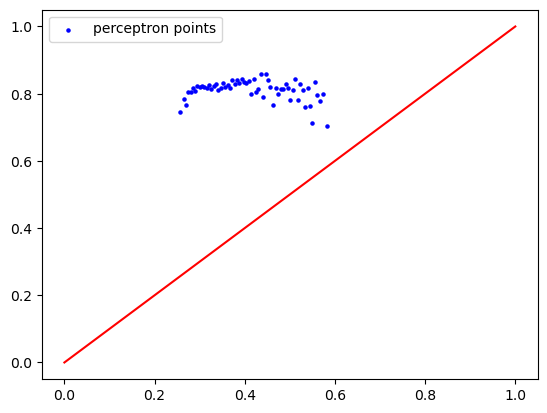

61
1000


In [139]:
data = list(zip(ROC_X, ROC_Y))

N_points = 200
point_range = 1 / N_points

# Sort the data based on ROC_X, then select the maximum ROC_Y for each unique ROC_X
sorted_data = sorted(data, key=lambda x: x[0])  # Sort by ROC_X
unique_x = []
unique_y = []

# Keep track of the maximum ROC_Y for each unique ROC_X
current_x = sorted_data[0][0]
max_y = sorted_data[0][1]

for x, y in sorted_data:
    if x > current_x - point_range and x < current_x + point_range:
        max_y = max(max_y, y)  # Update max_y if y is higher
    else:
        unique_x.append(current_x)
        unique_y.append(max_y)
        current_x = x
        max_y = y

# Append the last pair
unique_x.append(current_x)
unique_y.append(max_y)

# Plot the results
a = np.linspace(0, 1, 100)
plt.scatter(unique_x, unique_y, color='blue', label='perceptron points', s=5)
plt.plot(a, a, color='red')  # Plot the "no skill" line
plt.legend()
plt.show()

print(len(unique_x))
print(len(ROC_X))

0.31407407407407406 0.15858132898491642


## EXTRA
# CUT ATTEMPT by LBroc


The cut is going to be performed given a minimium number of hadrons to be kept as hadrons (not false gammas). Per each number of hadrons the parameters are going to be given a minimum cut value, to be optimize maximizing Q. The dataset is not going to be split, and per each parameter Q is going to be computed, so that applying them on test set we can have ROC points per each value of true_hadrons

split dataset functions

In [167]:
# this function divides the dataset in input in parts_to_be_split parts. One of them is returned as test_set
# the other ones are the training_set. Indexes of the chosen data can be accessed (test_indexes, train_indexes)
# (for example in a K-fold)

def split_train_test_set(data,parts_to_be_split):
    indexes = np.arange(0,data.shape[0],1)
    rnd.shuffle(indexes)
    len_test_set = int(len(indexes) / parts_to_be_split)

    test_indexes = indexes[:len_test_set]
    train_indexes = indexes[len_test_set:]

    train_set = data.iloc[train_indexes]
    test_set = data.iloc[test_indexes]
    
    return train_set, test_set

1/5 of the total dataset is here picked as test set. This can be easily changed

In [176]:
file_name="magic04.data"
data = pd.DataFrame(pd.read_csv(file_name))
data.columns=['fLength','fWidth','fSize',
        'fConc','fConc1','fAsym',
        'fM3Long','fM3Trans','fAlpha','fDist','category']


train_set, test_set = split_train_test_set(data,5)

print('shape of train_set:',np.shape(train_set))
print('shape of test set:',np.shape(test_set))

shape of train_set: (15216, 11)
shape of test set: (3803, 11)


Functions for finding cut values

In [169]:
# this function takes col category and returns as Y (target), the other columns are X (labels)
def split_X_Y(data):
    Y = data['category']
    X = data.drop('category',axis=1)

    return X,Y

In [170]:
X_train, Y_train = split_X_Y(train_set)
X_test, Y_test = split_X_Y(test_set)

print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(Y_train))
print(np.shape(Y_test))



(15216, 10)
(3803, 10)
(15216,)
(3803,)


Study the features and their CDF relative to hadron fraction

In [171]:
def hadron_CDF(X_train,Y_train,sel_label):
    new_X = X_train[X_train.columns[sel_label]]
    new_data = np.vstack((new_X,Y_train))
    new_data_sorted = new_data[:, new_data[0].argsort()]
    # setup vars, cut value is  set to max of the label, so that in worst scenario all points are true hadrons
    hadrons_fraction = np.zeros(new_data_sorted.shape[1])
    index = np.zeros(new_data_sorted.shape[1])
    true_hadrons = 0
    tot_h = len(Y_train[Y_train == 'h'])
    
    for i in range(new_data_sorted.shape[1]):
    
        if new_data_sorted[1,i] == 'h':
            true_hadrons += 1
        index[i] = i
        hadrons_fraction[i] = true_hadrons / tot_h
            
    return index,hadrons_fraction

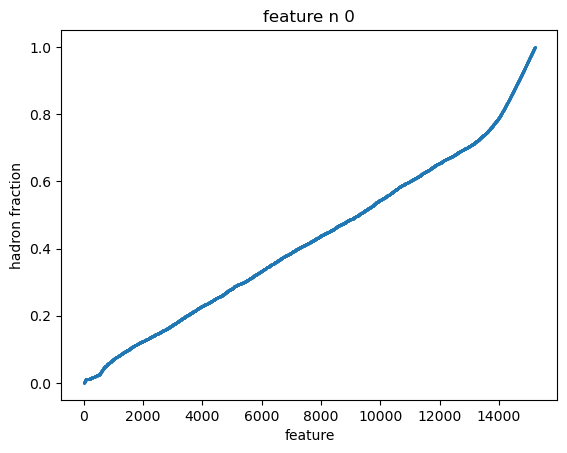

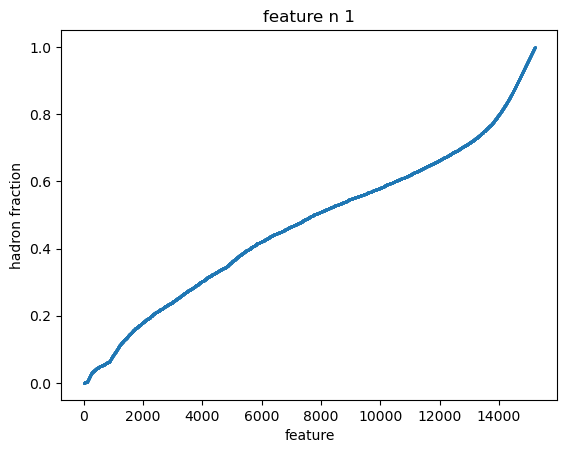

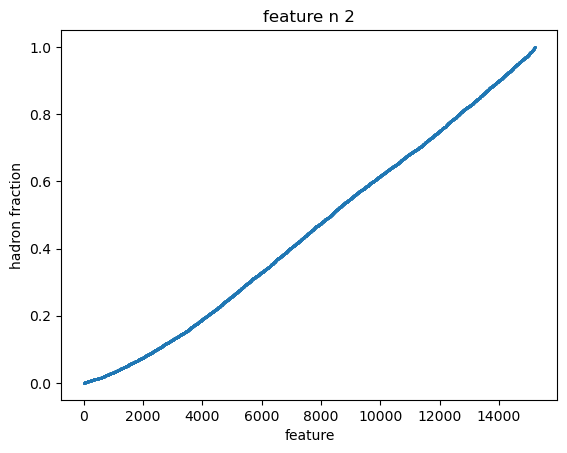

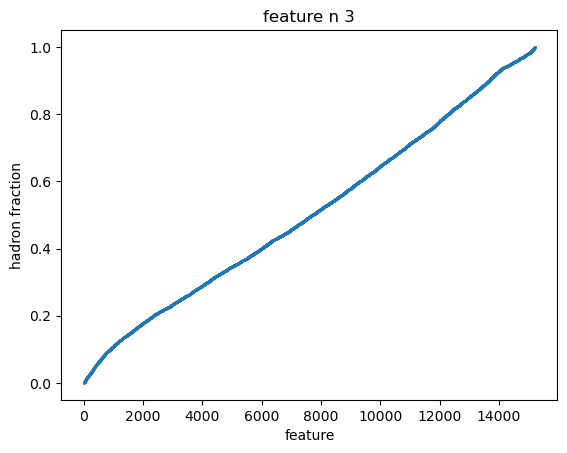

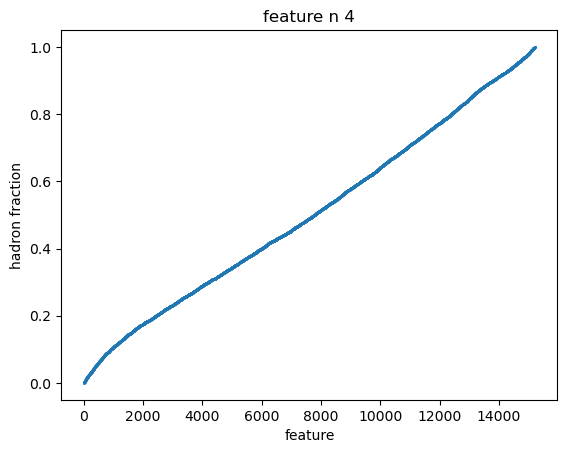

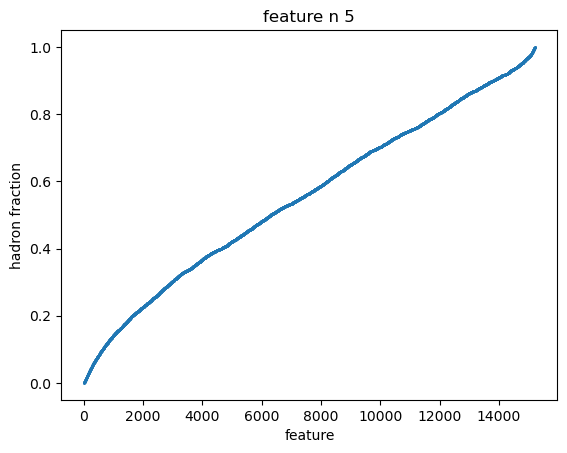

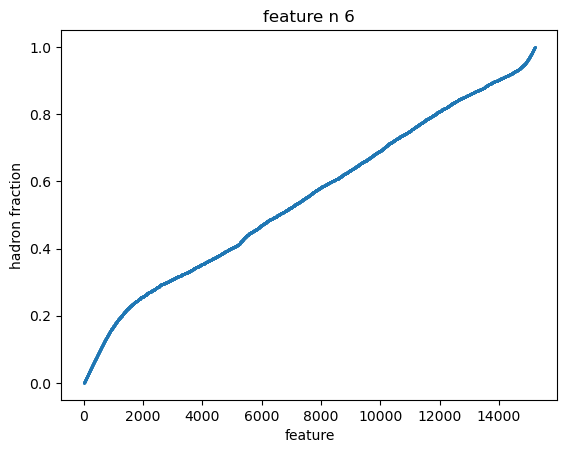

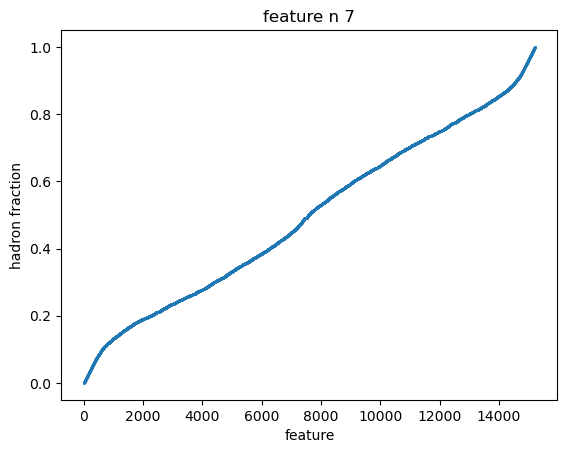

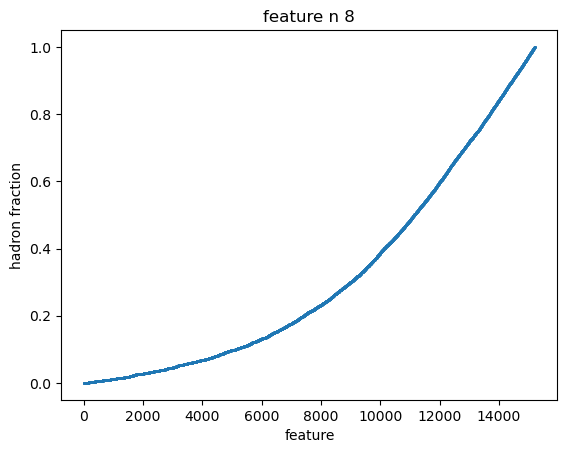

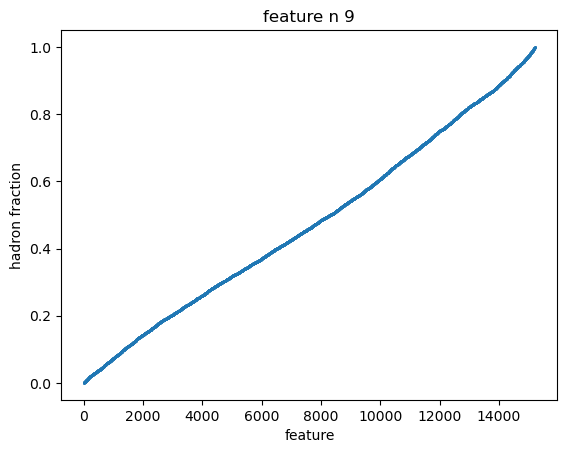

In [172]:
for i in range(X_train.shape[1]):
    index, hadrons_fraction = hadron_CDF(X_train,Y_train,i)
    plt.scatter(index,hadrons_fraction,s=0.3)
    title = 'feature n '+str(i)
    plt.title(title)
    plt.xlabel('feature')
    plt.ylabel('hadron fraction')
    plt.show()

for features n 0-1-8 may be better to cut from high values

In [173]:
# this function finds the minimum cut value for given label to compute
def find_min_cut_value(X_train,Y_train,sel_label,min_hadrons):
    new_X = X_train[X_train.columns[sel_label]]
    new_data = np.vstack((new_X,Y_train))
    new_data_sorted = new_data[:, new_data[0].argsort()]
    # setup vars, cut value is  set to max of the label, so that in worst scenario all points are true hadrons
    true_hadrons = 0
    min_cut_value = new_data_sorted[0,new_data_sorted.shape[1]-1]
    
    for i in range(new_data_sorted.shape[1]):
        if new_data_sorted[1,i] == 'h':
            true_hadrons += 1
        if true_hadrons == min_hadrons:
            min_cut_value = new_data_sorted[0,i]
            
    return min_cut_value

def find_max_cut_value(X_train,Y_train,sel_label,min_hadrons):
    new_X = X_train[X_train.columns[sel_label]]
    new_data = np.vstack((new_X,Y_train))
    new_data_sorted = new_data[:, new_data[0].argsort()]
    
    new_data_sorted_reversed = new_data_sorted[:, ::-1] #reverse!! STARTING FROM MAXX
    
    # setup vars, cut value is  set to max of the label, so that in worst scenario all points are true hadrons
    true_hadrons = 0
    max_cut_value = new_data_sorted_reversed[0,new_data_sorted.shape[1]-1]
    
    for i in range(new_data_sorted_reversed.shape[1]):
        if new_data_sorted_reversed[1,i] == 'h':
            true_hadrons += 1
        if true_hadrons == min_hadrons:
            max_cut_value = new_data_sorted_reversed[0,i]
            
    return max_cut_value


def compute_Q(new_X,Y_train,cut_value):
    tot_g = len(Y_train[Y_train == 'g'])
    tot_h = len(Y_train[Y_train == 'h'])
    n_accepted_g = 0
    n_accepted_h = 0
    
    for j in range(len(Y_train)):                
        if (new_X.iloc[j] < cut_value and Y_train.iloc[j] == 'g'):
            n_accepted_g += 1
        if (new_X.iloc[j] < cut_value and Y_train.iloc[j] == 'h'):
            n_accepted_h += 1
    #if(n_accepted_h == 0):
    
    #n_accepted_h = 0.01
    
    epsilon_g = n_accepted_g / tot_g
    epsilon_h = n_accepted_h / tot_h
    
    sigma = n_accepted_g / np.sqrt( 2 * n_accepted_h + n_accepted_g )
    
    return epsilon_g / np.sqrt(epsilon_h)
    #return sigma


def find_better_cut_value(X_train,Y_train,sel_label,min_cut_value):
    new_X = X_train[X_train.columns[sel_label]]
    max_cut_value = max(new_X)
    
    #iterations of repeating Q calculus, edit to improve accuracy (and decrease performance)
    N_iter = 10
    step = abs(max_cut_value - min_cut_value) / N_iter
    best_Q = compute_Q(new_X,Y_train,min_cut_value)
    best_cut = min_cut_value
    
    for i in range(N_iter):
        cut = min_cut_value + i * step
        Q = compute_Q(new_X,Y_train,cut)
        
        #threshold for Q is at least 1.2
        if( Q > best_Q ):
            best_Q = Q.copy()
            best_cut = cut
            
    return best_Q, best_cut


def find_min_ROC_coordinates(X_train,Y_train,X_test,Y_test,min_hadrons):
    X_ROC = 0
    Y_ROC = 0
    X_ROC_BETTER = 0
    Y_ROC_BETTER = 0
    
    min_cut_values = []
    better_cut_values = []
    
    for i in range(len(X_train.columns)):
        min_cut_value = find_max_cut_value(X_train,Y_train,i,min_hadrons)
        #min_cut_value = find_min_cut_value(X_train,Y_train,i,min_hadrons)
        #Q, better_cut_value = find_better_cut_value(X_train,Y_train,i,min_cut_value)
        #this line uses the find better cut value function
        
        min_cut_values.append(min_cut_value)
        #better_cut_values.append(better_cut_value)
        #print(i,'min_cut:',min_cut_value)
        #print(i,'better_cut:',better_cut_value)
        
    n_accepted_g = 0
    n_accepted_h = 0
    #n_accepted_gb = 0
    #n_accepted_hb = 0
    #print(min_cut_values)
    #print(min_cut_values)
    #print(better_cut_values)
    for j in range(len(Y_test)):
        acc = 1
        accb = 1
        for i in range(len(min_cut_values)):
            #if (X_test[X_test.columns[i]].iloc[j] > min_cut_values[i] and i == 0 or i == 1 or i == 8):
            #    acc = 0
            if (X_test[X_test.columns[i]].iloc[j] > min_cut_values[i]):
                acc = 0
            #if (X_test[X_test.columns[i]].iloc[j] < better_cut_values[i]):
            #    accb = 0
        #print(acc)  
        if (acc == 1 and Y_test.iloc[j] == 'g'):
            n_accepted_g += 1
        if (acc == 1 and Y_test.iloc[j] == 'h'):
            n_accepted_h += 1
            
        #if (accb == 1 and Y_test.iloc[j] == 'g'):
        #    n_accepted_gb += 1
        #if (accb == 1 and Y_test.iloc[j] == 'h'):
        #    n_accepted_hb += 1
            
    
    tot_g = len(Y_test[Y_test == 'g'])
    tot_h = len(Y_test[Y_test == 'h'])
    '''print(n_accepted_g,tot_g)
    print(n_accepted_h,tot_h)'''
    Y_ROC = n_accepted_g / tot_g
    X_ROC = n_accepted_h / tot_h
    #Y_ROC_BETTER = n_accepted_gb / tot_g
    #X_ROC_BETTER = n_accepted_hb / tot_h
    
    return X_ROC, Y_ROC, min_cut_values                  #, X_ROC_BETTER, Y_ROC_BETTER




Worst possible selection results

In [174]:
tot_h = len(Y_test[Y_test == 'h'])

print(np.shape(X_train))
print(np.shape(Y_train))
print(np.shape(X_test))
print(np.shape(X_test))
ROC_CURVE_X = []
ROC_CURVE_Y = []
BETTER_ROC_CURVE_X = []
BETTER_ROC_CURVE_Y = []
WS = []

for i in range(tot_h):
    
    #reduce points and improves performance
    
    X_ROC, Y_ROC, min_cut_values = find_min_ROC_coordinates(X_train,Y_train,X_test,Y_test,i)
    ROC_CURVE_X.append(X_ROC)
    ROC_CURVE_Y.append(Y_ROC)
    WS.append(min_cut_values)
        #BETTER_ROC_CURVE_X.append(XB_ROC)
        #BETTER_ROC_CURVE_Y.append(YB_ROC)

    #print(i,X_ROC,Y_ROC)
        #print(i,XB_ROC,YB_ROC,'\n')

(15216, 10)
(15216,)
(3803, 10)
(3803, 10)


1346
best parameters are:
[148.32, 62.1895, 3.4746, 0.6178, 0.3622, 41.9106, 63.7112, 25.5043, 78.633, 301.058]


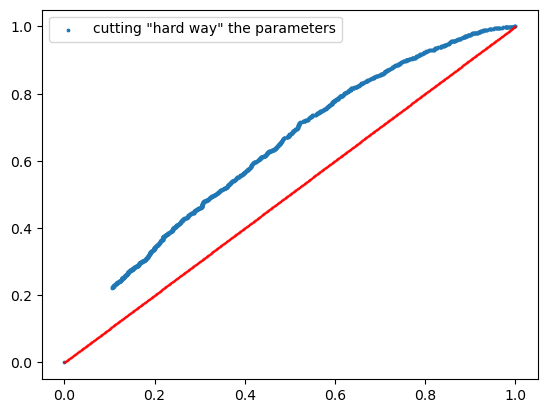

In [175]:
x=np.linspace(0,1,1000)
print(len(ROC_CURVE_X))

distances = np.zeros(len(WS))
for i in range(len(WS)):
    distances[i] = np.sqrt((ROC_CURVE_X[i])**2 + (1-ROC_CURVE_Y[i])**2)
    
best_index = np.argmin(distances)
best_w = WS[best_index]
print('best parameters are:')
print(best_w)

plt.scatter(ROC_CURVE_X,ROC_CURVE_Y,s=3,label='cutting "hard way" the parameters')
plt.scatter(x,x,s=0.3,color='red',alpha=0.75)
plt.legend()
plt.show()